In [3]:
import os
if 'DISPLAY' in os.environ:
    del os.environ['DISPLAY']
import sys
sys.path.insert(0, '/usr/local/nrn/lib/python/')

In [4]:
# import libraries
from neuron import h, gui
import matplotlib.pyplot as plt


In [5]:
# construct the soma
soma = h.Section(name = 'soma')

h.topology()
h.psection()

soma.L = 20
soma.diam = 20


|-|       soma(0-1)

soma { nseg=1  L=100  Ra=35.4
	/*location 0 attached to cell 0*/
	/* First segment only */
	insert morphology { diam=500}
	insert capacitance { cm=1}
}


In [6]:
#probe the soma, include biophysical mechs
dir(soma)

soma.insert("hh")
## maybe hodgkin-huxley biphys mech could be placed near the proximal neurite and see if the agreement correlates with 
## experimental data? 
## proximal neurite --?? 

soma

In [7]:
# create iclamp at the soma (matching the electrophysiologic injection):

iclamp = h.IClamp(soma(0.5))
iclamp.delay = 30
iclamp.dur = 200
iclamp.amp - -0.01

0.01

In [8]:
# set up some recording variables
v = h.Vector().record(soma(0.5)._ref_v)  # membrane potential vector
t = h.Vector().record(h._ref_t)  # time stamp vector

In [9]:
# set up the simulation
h.load_file("stdrun.hoc")

1.0

In [10]:
# simulation parameters
h.finitialize(-55)

1.0

In [11]:
h.continuerun(260)

0.0

from bokeh.io import output_notebook
import bokeh.plotting as plt

output_notebook()

In [12]:
%matplotlib inline

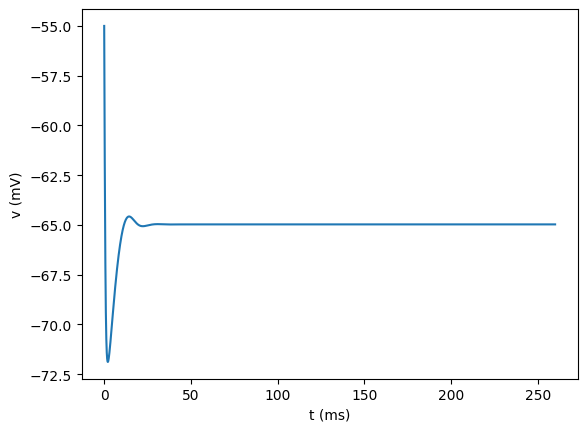

In [13]:
plt.figure()
plt.plot(t, v)
plt.xlabel("t (ms)")
plt.ylabel("v (mV)")
plt.show()